<a href="https://colab.research.google.com/github/kashishthakur26/Tensorflow-learning/blob/main/computer_vision_and_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab-notebooks/pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

## Inspect data


In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os 

for dirpath , dirnames , filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'. ")

There are 2 directories and 0 images in 'pizza_steak'. 
There are 2 directories and 0 images in 'pizza_steak/test'. 
There are 0 directories and 250 images in 'pizza_steak/test/steak'. 
There are 0 directories and 250 images in 'pizza_steak/test/pizza'. 
There are 2 directories and 0 images in 'pizza_steak/train'. 
There are 0 directories and 750 images in 'pizza_steak/train/steak'. 
There are 0 directories and 750 images in 'pizza_steak/train/pizza'. 


### Visualizeing our images using matplotlib


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir , target_class):

  target_folder  = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder +"/"+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img

['3039549.jpg']
Image shape: (384, 512, 3)


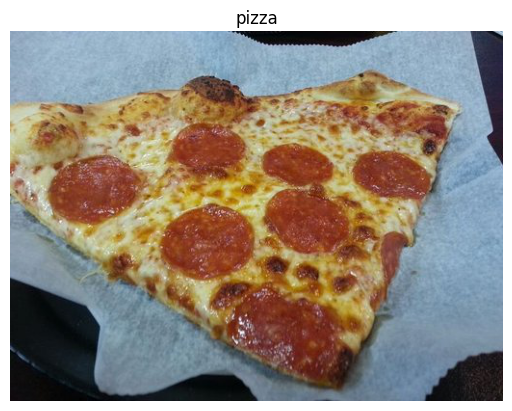

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
import tensorflow as tf

In [ ]:
img = tf.constant(img)


In [ ]:
img.shape

TensorShape([384, 512, 3])

Let's build a convolution neural network to find patterns in our images, more specifically we a need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10 ,3 , activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1 , activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 14s 269ms/step - loss: 0.6044 - accuracy: 0.6607 - val_loss: 0.4443 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4457 - accuracy: 0.7960 - val_loss: 0.3451 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 12s 261ms/step - loss: 0.4291 - accuracy: 0.8020 - val_loss: 0.3379 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 14s 292ms/step - loss: 0.3782 - accuracy: 0.8347 - val_loss: 0.3172 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 11s 239ms/step - loss: 0.3351 - accuracy: 0.8627 - val_loss: 0.3017 - val_accuracy: 0.8800


In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_8 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

['2136662.jpg']
Image shape: (512, 512, 3)
['1836888.jpg']
Image shape: (512, 512, 3)


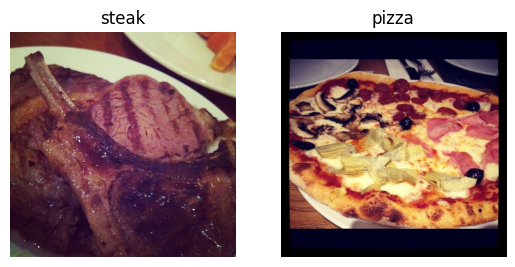

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img= view_random_image("pizza_steak/train/","pizza")


## Preprocess the data(prepare it for a model)


In [ ]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"


our next step is to turn our data into **batches**.
A batch is am small subset of data. Rather than look at all -10,000 
images at one time, a model might only look at 32 at a time. 

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to lesrn very well.

Why 32?


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)



In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you keep experimenting, you try to beat the baseline.


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPool2D , Activation
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),

    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")

])

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_12 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_13 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_3 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model_4.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data= test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 239ms/step - loss: 1.2347 - accuracy: 0.5993 - val_loss: 0.6051 - val_accuracy: 0.6640
Epoch 2/5
47/47 [==============================] - 11s 235ms/step - loss: 0.4770 - accuracy: 0.7780 - val_loss: 0.3919 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 10s 217ms/step - loss: 0.3606 - accuracy: 0.8547 - val_loss: 0.3454 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 11s 237ms/step - loss: 0.2677 - accuracy: 0.9033 - val_loss: 0.3704 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 11s 239ms/step - loss: 0.1466 - accuracy: 0.9600 - val_loss: 0.3740 - val_accuracy: 0.8360


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 145ms/step - loss: 0.3017 - accuracy: 0.8800


[0.30169743299484253, 0.8799999952316284]

In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 146ms/step - loss: 0.3740 - accuracy: 0.8360


[0.3740241527557373, 0.8360000252723694]

## Evaluating the model

In [ ]:
import pandas as pd

<Axes: >

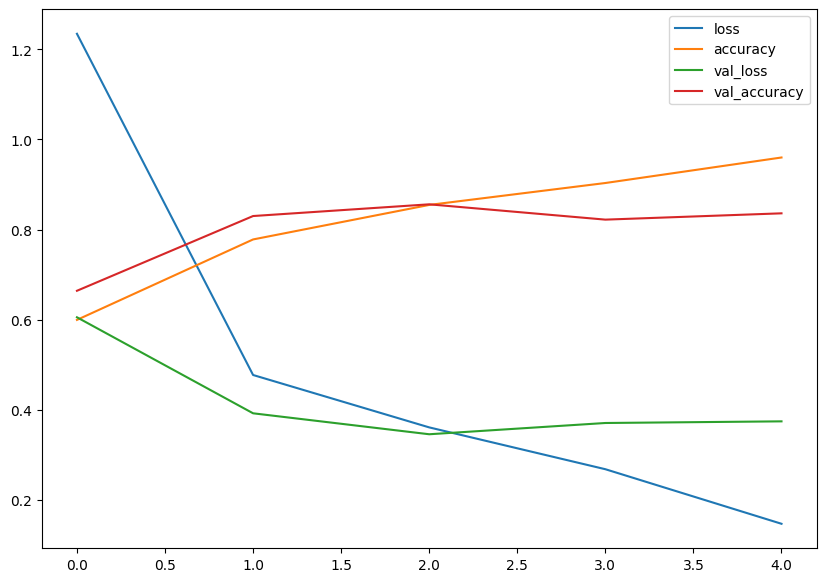

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7))

In [20]:
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss , label="training_loss")
  plt.plot(epochs , val_loss , label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot the accuracy
  plt.figure()
  plt.plot(epochs , accuracy , label="training_accuracy")
  plt.plot(epochs , val_accuracy , label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

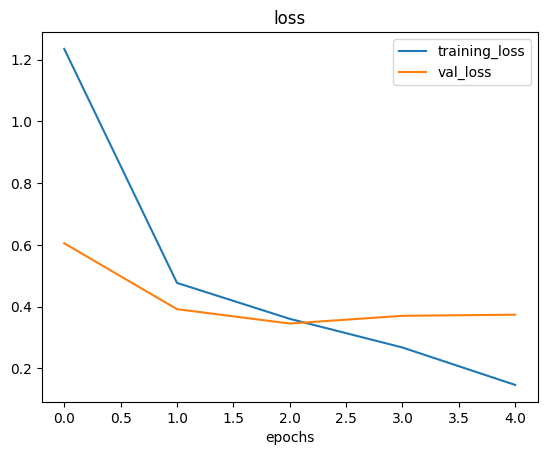

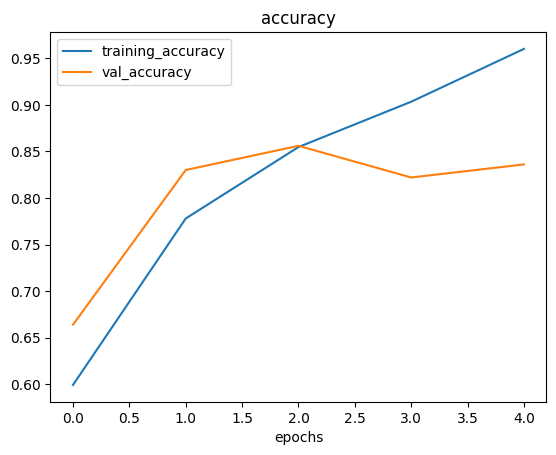

In [ ]:
plot_loss_curves(history=history)

Ideall the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates),when there are large differences your model may be overfitting.

## Adjust the model parameters
Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MAxPool2D)
* Add more data.....

In [ ]:
model_5 = Sequential([
    Conv2D(10,3 , activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 230ms/step - loss: 0.6094 - accuracy: 0.6580 - val_loss: 0.4911 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4416 - accuracy: 0.8040 - val_loss: 0.3463 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 10s 223ms/step - loss: 0.4084 - accuracy: 0.8193 - val_loss: 0.3222 - val_accuracy: 0.8780
Epoch 4/5
47/47 [==============================] - 10s 222ms/step - loss: 0.3906 - accuracy: 0.8287 - val_loss: 0.3647 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 10s 213ms/step - loss: 0.3638 - accuracy: 0.8473 - val_loss: 0.3006 - val_accuracy: 0.8740


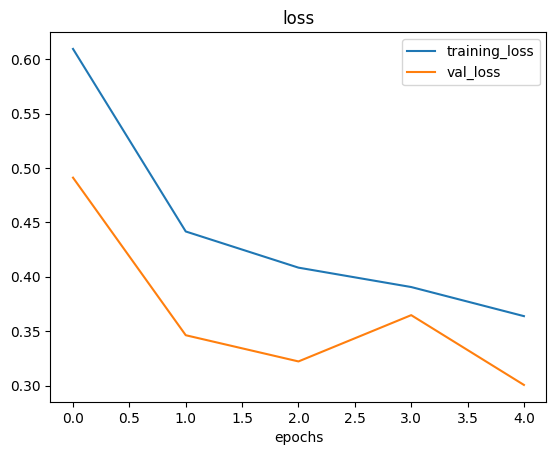

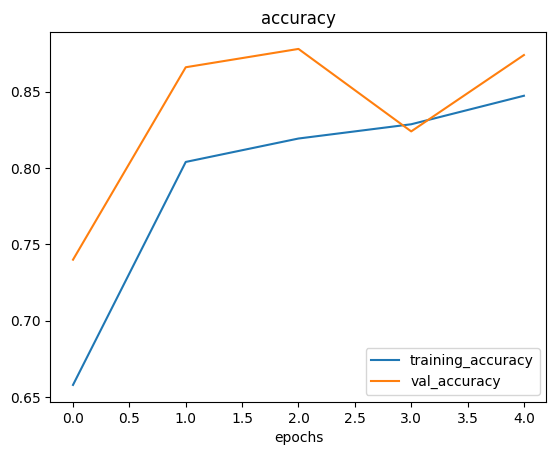

In [ ]:
plot_loss_curves(history_5)

## Data augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                               rotation_range=0.2,
                                               shear_range=0.2,
                                               zoom_range=0.2,
                                               width_shift_range=0.2,
                                               height_shift_range=0.3,
                                               horizontal_flip=True
                                               )

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
# Augmentated data model
model_6 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 519ms/step - loss: 0.7339 - accuracy: 0.4247 - val_loss: 0.6717 - val_accuracy: 0.6040
Epoch 2/5
47/47 [==============================] - 25s 529ms/step - loss: 0.6917 - accuracy: 0.5633 - val_loss: 0.6735 - val_accuracy: 0.5120
Epoch 3/5
47/47 [==============================] - 26s 560ms/step - loss: 0.6878 - accuracy: 0.5467 - val_loss: 0.6415 - val_accuracy: 0.6700
Epoch 4/5
47/47 [==============================] - 24s 523ms/step - loss: 0.6770 - accuracy: 0.5887 - val_loss: 0.6083 - val_accuracy: 0.6880
Epoch 5/5
47/47 [==============================] - 25s 527ms/step - loss: 0.6650 - accuracy: 0.5893 - val_loss: 0.6106 - val_accuracy: 0.6320


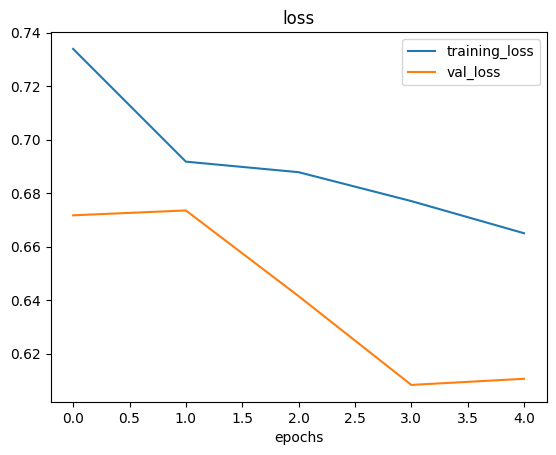

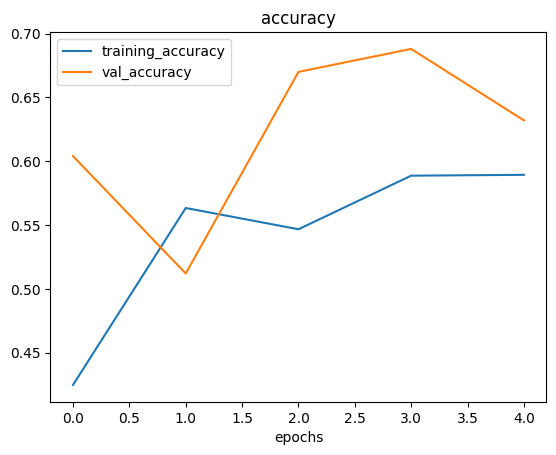

In [ ]:
plot_loss_curves(history_6)

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 526ms/step - loss: 0.6971 - accuracy: 0.5433 - val_loss: 0.6541 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 26s 563ms/step - loss: 0.6204 - accuracy: 0.6700 - val_loss: 0.4933 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 26s 552ms/step - loss: 0.5388 - accuracy: 0.7333 - val_loss: 0.4468 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 24s 512ms/step - loss: 0.4860 - accuracy: 0.7747 - val_loss: 0.3919 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 24s 502ms/step - loss: 0.4982 - accuracy: 0.7553 - val_loss: 0.4021 - val_accuracy: 0.8240


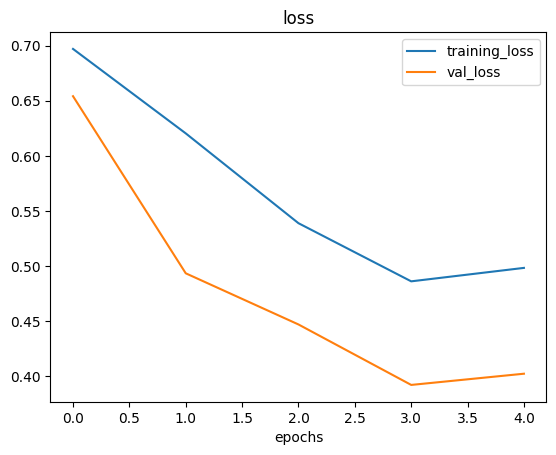

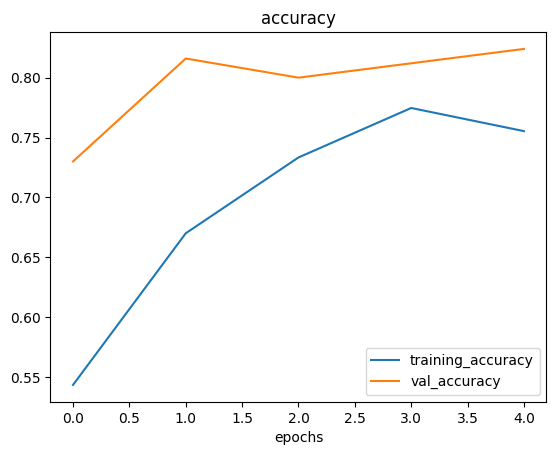

In [ ]:
plot_loss_curves(history_7)

--2023-05-30 18:09:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2023-05-30 18:09:49 (194 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



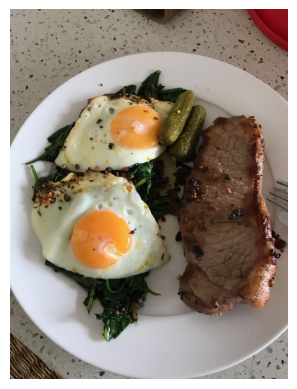

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [46]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [ ]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
model_7.predict(steak)

ValueError: ignored

In [ ]:
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [ ]:
pred=model_7.predict(steak)

1/1 [==============================] - 0s 159ms/step


In [ ]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [44]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 20ms/step


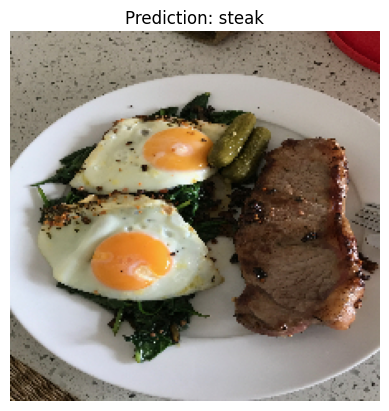

In [ ]:
pred_and_plot(model_7, "03-steak.jpeg", class_names)


--2023-05-30 18:32:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.3’

03-pizza-dad.jpeg.3 100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2023-05-30 18:32:18 (178 MB/s) - ‘03-pizza-dad.jpeg.3’ saved [2874848/2874848]

1/1 [==============================] - 0s 145ms/step


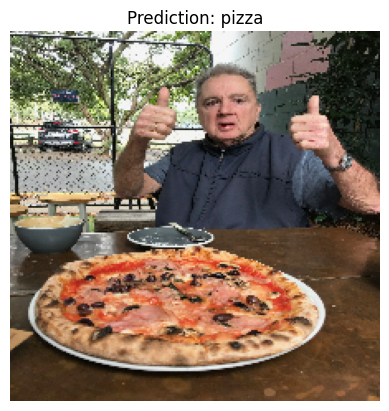

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_1, "03-pizza-dad.jpeg", class_names)

## Multi-class Image Classification
We've just been through a bunch of the following steps with a binary classification problem(pizza or steak), now we're going to step things up a notch with 10 classes of food(multi-class classification).

1. Become one with the data.
2. Preprocess the data(get it ready for a model)
3. Create a model(start with a bseline)
4. Fit a model (overfit it to make sure it works)
5. Evaluate the model.
6. Adjust differet hyperparameters and improve the model(try to beat baseline/reduce overfitting)
7. Repeat until satisfied


In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-05-31 05:05:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.195.128, 173.194.196.128, 64.233.191.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   171MB/s    in 2.9s    

2023-05-31 05:05:35 (171 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

for dirpath , dirnames , filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directions and {len(filenames)} images in '{dirpath}'.")

there are 2 directions and 0 images in '10_food_classes_all_data'.
there are 10 directions and 0 images in '10_food_classes_all_data/test'.
there are 0 directions and 250 images in '10_food_classes_all_data/test/ramen'.
there are 0 directions and 250 images in '10_food_classes_all_data/test/ice_cream'.
there are 0 directions and 250 images in '10_food_classes_all_data/test/steak'.
there are 0 directions and 250 images in '10_food_classes_all_data/test/fried_rice'.
there are 0 directions and 250 images in '10_food_classes_all_data/test/hamburger'.
there are 0 directions and 250 images in '10_food_classes_all_data/test/chicken_wings'.
there are 0 directions and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
there are 0 directions and 250 images in '10_food_classes_all_data/test/sushi'.
there are 0 directions and 250 images in '10_food_classes_all_data/test/pizza'.
there are 0 directions and 250 images in '10_food_classes_all_data/test/chicken_curry'.
there are 10 direction

In [4]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3661293.jpg']
Image shape: (512, 512, 3)


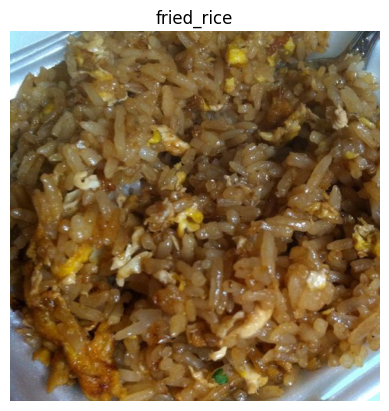

In [10]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## Preprocess the data

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten , Dense , Activation

In [16]:
model_10 = Sequential([
    Conv2D(10,3, input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10 , activation="softmax")
])

model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


In [24]:
# Fitting a model
history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 55s 234ms/step - loss: 1.9113 - accuracy: 0.3376 - val_loss: 1.9022 - val_accuracy: 0.3276
Epoch 2/5
235/235 [==============================] - 55s 233ms/step - loss: 1.7296 - accuracy: 0.4165 - val_loss: 1.9873 - val_accuracy: 0.3124
Epoch 3/5
235/235 [==============================] - 55s 232ms/step - loss: 1.3755 - accuracy: 0.5464 - val_loss: 2.0581 - val_accuracy: 0.3168
Epoch 4/5
235/235 [==============================] - 55s 234ms/step - loss: 0.8592 - accuracy: 0.7200 - val_loss: 2.7331 - val_accuracy: 0.3028
Epoch 5/5
235/235 [==============================] - 55s 236ms/step - loss: 0.3735 - accuracy: 0.8856 - val_loss: 3.5067 - val_accuracy: 0.2816


In [25]:
model_10.evaluate(test_data)

79/79 [==============================] - 13s 166ms/step - loss: 3.5067 - accuracy: 0.2816


[3.506664514541626, 0.2815999984741211]

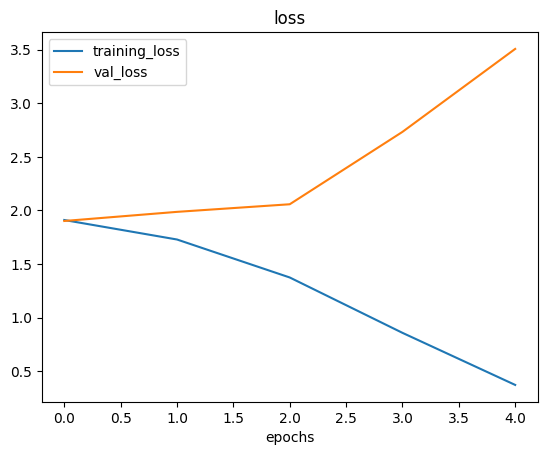

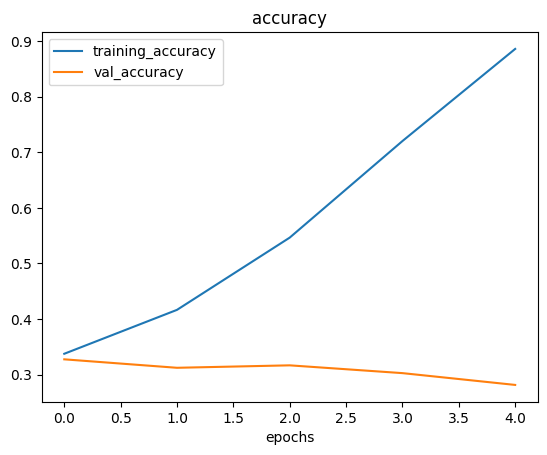

In [26]:
plot_loss_curves(history_10)

## Adjusting the model hyperparameters (to beat the baseline/reduce overfitting)

In [27]:
model_10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_5 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

## Trying to reduce ovefitting with data augmentation


In [36]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   shuffle=True,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [37]:
model_11 = tf.keras.models.clone_model(model_10)

model_11.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [38]:
his_11 = model_11.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 122s 513ms/step - loss: 2.1960 - accuracy: 0.1868 - val_loss: 2.0475 - val_accuracy: 0.2544
Epoch 2/5
235/235 [==============================] - 128s 547ms/step - loss: 2.0706 - accuracy: 0.2568 - val_loss: 1.9547 - val_accuracy: 0.2984
Epoch 3/5
235/235 [==============================] - 120s 509ms/step - loss: 2.0152 - accuracy: 0.2896 - val_loss: 1.8862 - val_accuracy: 0.3376
Epoch 4/5
235/235 [==============================] - 120s 511ms/step - loss: 1.9842 - accuracy: 0.3095 - val_loss: 1.8174 - val_accuracy: 0.3664
Epoch 5/5
235/235 [==============================] - 128s 543ms/step - loss: 1.9306 - accuracy: 0.3283 - val_loss: 1.8350 - val_accuracy: 0.3552


In [40]:
model_11.evaluate(test_data)

79/79 [==============================] - 12s 144ms/step - loss: 1.8350 - accuracy: 0.3552


[1.834997296333313, 0.35519999265670776]

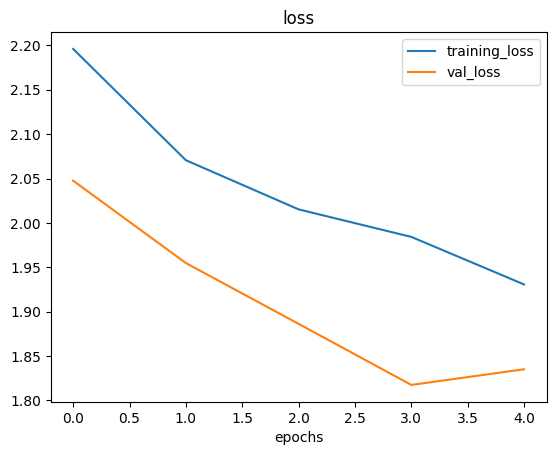

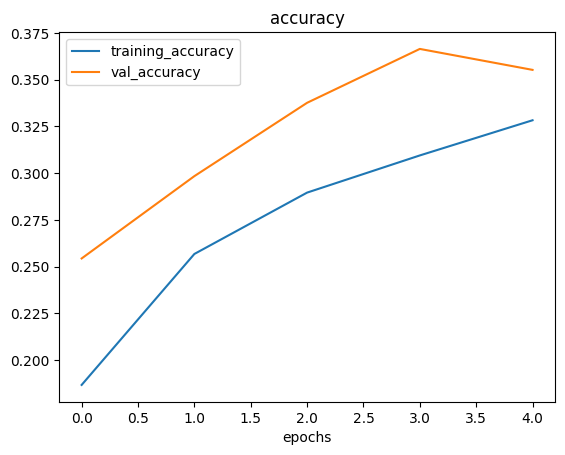

In [41]:
plot_loss_curves(his_11)

##Predictting a test images using trained model

In [39]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [42]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 [==============================] - 0s 20ms/step


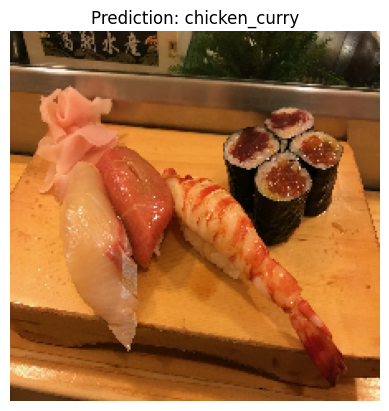

In [49]:
pred_and_plot(model=model_11, 
              filename="03-sushi.jpeg", 
              class_names=class_names)

1/1 [==============================] - 0s 26ms/step


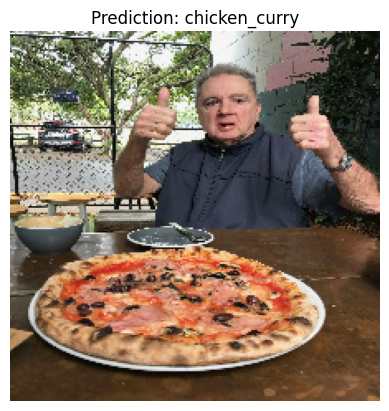

In [50]:
pred_and_plot(model=model_11, 
              filename="03-pizza-dad.jpeg", 
              class_names=class_names)

1/1 [==============================] - 0s 32ms/step


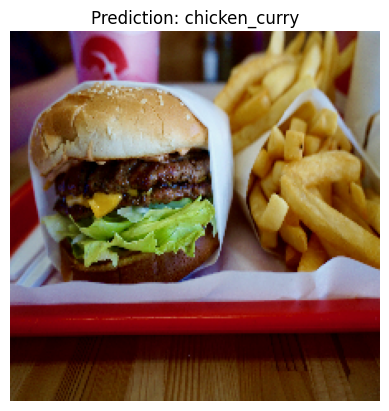

In [51]:
pred_and_plot(model=model_11, 
              filename="03-hamburger.jpeg", 
              class_names=class_names)

In [52]:
model_11.save("saved_trained_model_11")

In [54]:
loaded_model_10= tf.keras.models.load_model("saved_trained_model_11")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 13s 156ms/step - loss: 1.8350 - accuracy: 0.3552


[1.8349980115890503, 0.35519999265670776]

In [55]:
model_11.evaluate(test_data)

79/79 [==============================] - 13s 169ms/step - loss: 1.8350 - accuracy: 0.3552


[1.834997296333313, 0.35519999265670776]